In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [43]:

path = "D:\Projects\IMC_Challenge\logs\814bb152-163c-4ab7-a3ca-46c2d7364c00.log"
df = pd.read_csv(path, sep=";",skiprows=range(0, 10005),nrows=4000)
df['mid_price'] = (df['bid_price_1']+df['ask_price_1'])/2
print(df.columns.values.tolist())

# create dataframes for separate instruments and calculate rolling averages
df_am = df.loc[df["product"] == "AMETHYSTS"]
df_am['it'] = df_am['timestamp']/100
df_am['20it_rolling'] = df_am['mid_price'].rolling(20).mean()

df_star = df.loc[df["product"] == "STARFRUIT"]
df_star['it'] = df_star['timestamp']/100
df_star['20it_rolling'] = df_star['mid_price'].rolling(20).mean()


['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss']


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\reves\AppData\Local\Temp\ipykernel_24200\851712352.py:1: SyntaxWarning: invalid escape sequence '\P'
  path = "D:\Projects\IMC_Challenge\logs\814bb152-163c-4ab7-a3ca-46c2d7364c00.log"
C:\Users\reves\AppData\Local\Temp\ipykernel_24200\851712352.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am['it'] = df_am['timestamp']/100
C:\Users\reves\AppData\Local\Temp\ipykernel_24200\851712352.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

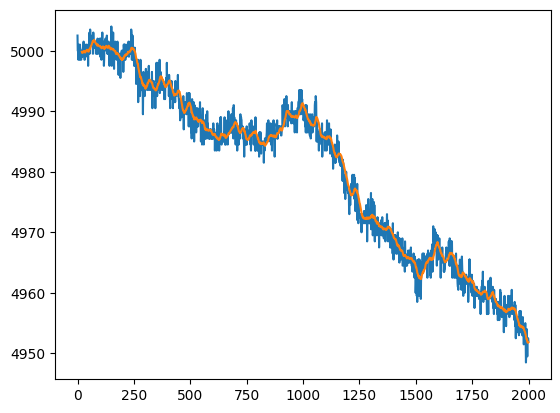

In [5]:
plt.plot(df_star['it'],df_star['mid_price'])
plt.plot(df_star['it'],df_star['20it_rolling'])

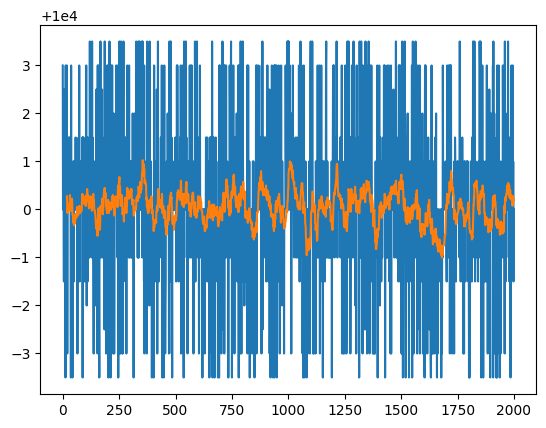

In [6]:
plt.plot(df_am['it'], df_am['mid_price'])
plt.plot(df_am['it'],df_am["20it_rolling"])

C:\Users\reves\AppData\Local\Temp\ipykernel_24200\536996954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_am['spread'] = (df_am['ask_price_1']-df_am['bid_price_1'])


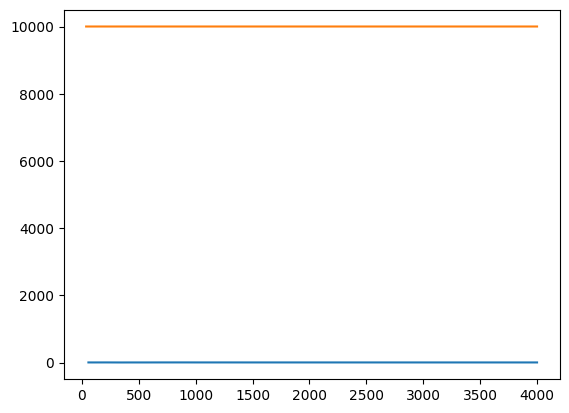

In [18]:
df_am['spread'] = (df_am['ask_price_1']-df_am['bid_price_1'])
plt.plot(df_am['spread'].rolling(30).mean())
plt.plot(df_am["20it_rolling"])

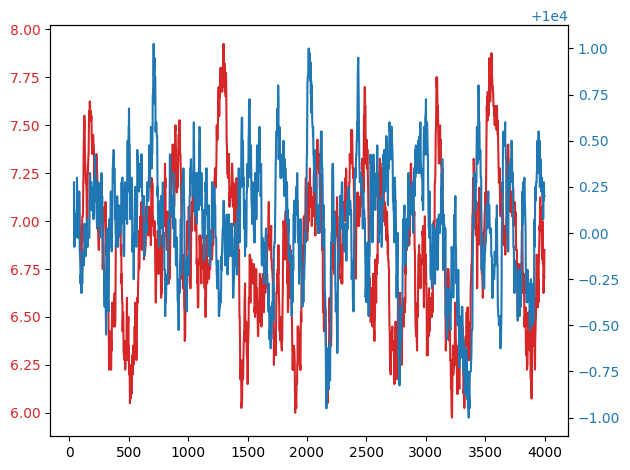

In [20]:
fig, ax1 = plt.subplots()

color = 'tab:red'
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('exp', color=color)
ax1.plot(df_am['spread'].rolling(40).mean(), color=color, )
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(df_am["20it_rolling"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [21]:
r = np.corrcoef(df_am['spread'], df_am['mid_price'])

In [22]:
r

array([[ 1.        , -0.04642858],
       [-0.04642858,  1.        ]])

In [25]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result

In [36]:
def acf(x, length=50):
    return np.array([1]+[np.corrcoef(x[:-i], x[i:])[0,1]  \
        for i in range(1, length)])

In [37]:
acf(df_am['mid_price'])

array([ 1.00000000e+00, -9.09825177e-03, -2.76656525e-02, -1.12205954e-02,
        2.01016189e-02, -3.92639866e-02, -8.43205925e-03,  2.62638370e-02,
        2.65066124e-02,  7.68651502e-03,  2.50753492e-02,  4.60922976e-02,
       -3.92244231e-02,  8.38596701e-03, -2.01793576e-03, -5.62755124e-03,
       -4.59350367e-03, -3.95018098e-03,  1.27893177e-02, -8.00228583e-03,
        2.43388633e-02,  1.76414071e-02,  5.07812065e-02, -2.79218529e-02,
        1.28031642e-02, -3.46674109e-04, -2.05758158e-02,  3.99466872e-02,
       -8.07588231e-03,  6.94399505e-03,  2.39048719e-02,  3.83492793e-02,
        1.86883451e-02, -1.34627404e-02, -1.03986221e-02,  3.24742523e-03,
       -5.30166551e-02,  5.62641169e-03,  9.23642840e-04,  4.47713271e-04,
        1.63001362e-02,  1.44203325e-02, -2.84973866e-03, -1.62174518e-02,
       -4.32971523e-03, -5.81982740e-02,  2.42760381e-02, -3.66784362e-02,
        1.74667386e-02, -6.27445336e-04])

(array([  56.,    0.,    0.,   97.,    0.,    0.,    0.,   10.,    0.,
           0.,   15.,    0.,    0.,    0.,   94.,    0.,    0.,  172.,
           0.,    0.,    0.,    0.,    0.,    0.,    0., 1059.,    0.,
           0.,    0.,    0.,    0.,    0.,  190.,    0.,    0.,  102.,
           0.,    0.,    0.,   19.,    0.,    0.,   10.,    0.,    0.,
           0.,  119.,    0.,    0.,   57.]),
 array([ 9996.5 ,  9996.64,  9996.78,  9996.92,  9997.06,  9997.2 ,
         9997.34,  9997.48,  9997.62,  9997.76,  9997.9 ,  9998.04,
         9998.18,  9998.32,  9998.46,  9998.6 ,  9998.74,  9998.88,
         9999.02,  9999.16,  9999.3 ,  9999.44,  9999.58,  9999.72,
         9999.86, 10000.  , 10000.14, 10000.28, 10000.42, 10000.56,
        10000.7 , 10000.84, 10000.98, 10001.12, 10001.26, 10001.4 ,
        10001.54, 10001.68, 10001.82, 10001.96, 10002.1 , 10002.24,
        10002.38, 10002.52, 10002.66, 10002.8 , 10002.94, 10003.08,
        10003.22, 10003.36, 10003.5 ]),
 <BarContainer o

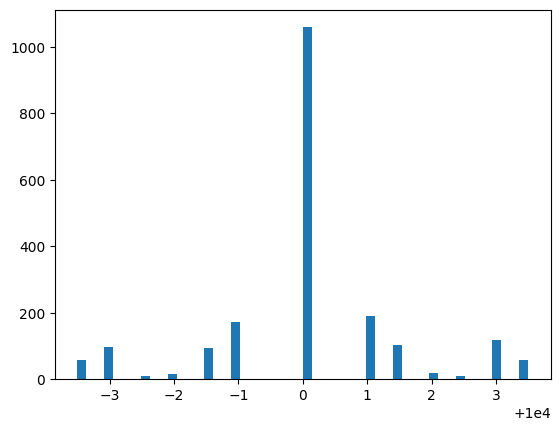

In [5]:
plt.hist(df_am['mid_price'],bins=50)

In [110]:
np.array(df_star.keys)

array(<bound method NDFrame.keys of       day  timestamp    product  bid_price_1  bid_volume_1  bid_price_2  \
1      -2          0  STARFRUIT         5002             1       4997.0   
3      -2        100  STARFRUIT         4997            24          NaN   
4      -2        200  STARFRUIT         4997             2       4996.0   
7      -2        300  STARFRUIT         4996            31          NaN   
9      -2        400  STARFRUIT         4995            27          NaN   
...   ...        ...        ...          ...           ...          ...   
3990   -2     199500  STARFRUIT         4949            23          NaN   
3993   -2     199600  STARFRUIT         4949            22          NaN   
3994   -2     199700  STARFRUIT         4949            27          NaN   
3996   -2     199800  STARFRUIT         4949            21          NaN   
3998   -2     199900  STARFRUIT         4950            32          NaN   

      bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask

## Amethyst
- try to predict best bid/ask, from volume and previous best bid/ask, test statistical significance of prediction

In [236]:
df_am = df_am.fillna(0)
df_am['ask_price_1_av'] = df_am['ask_price_1'].rolling(5).mean()
df_am['total_bid_voltume'] = df_am['bid_volume_1'] + df_am['bid_volume_2'] + df_am['bid_volume_3']
df_am['total_ask_volume'] = df_am['ask_volume_1'] + df_am['ask_volume_2'] + df_am['ask_volume_3']

In [253]:
from statsmodels.tsa.arima.model import ARIMA

ARMA_model = ARIMA(endog=df_am['ask_price_1'], order=(0, 0, 5))
results = ARMA_model.fit()
print(results.summary())

C:\Users\reves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\reves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\reves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            ask_price_1   No. Observations:                 2000
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -4108.525
Date:                Thu, 04 Apr 2024   AIC                           8231.050
Time:                        20:50:59   BIC                           8270.257
Sample:                             0   HQIC                          8245.446
                               - 2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const           1e+04      0.081   1.23e+05      0.000       1e+04       1e+04
ma.L1          0.0218      0.023      0.951      0.342      -0.023       0.067
ma.L2          0.0124      0.021      0.584      0.5

In [255]:
df_am['forecast'] = results.predict(start=2000,end=3999)

C:\Users\reves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\reves\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
df_am[[]]

In [234]:


X = []
Y = []
trend = np.array(df_am['mid_price'].to_list())

timestep = 10

for i in range(len(trend)-timestep-1):
    sublist = df_am['mid_price'].values[i:i+timestep]
    # t=3 R=0.916
    sublist_1 = np.concatenate((df_am['bid_price_1'].values[i:i+timestep], df_am['bid_volume_1'].values[i:i+timestep]), axis=0)
    # t=3 R=0.908
    sublist_2 = df_am['bid_price_1'].values[i:i+timestep]
    # 
    sublist_3 = np.concatenate((df_am['bid_price_1'].values[i:i+timestep], df_am['total_bid_volume'].values[i:i+timestep]), axis=0)
    sublist_4 = np.concatenate((df_am['ask_price_1'].values[i:i+timestep], df_am['total_ask_volume'].values[i:i+timestep]), axis=0)
    sublist_final = np.concatenate((sublist_3,sublist_4),axis=0)
    print(sublist)
    X.append(sublist)
    Y.append(df_am['mid_price'].values[i+timestep])

X = np.array(X)
Y = np.array(Y)
print(X.shape)
print(Y.shape)


[10003.  10000.  10000.  10000.  10000.   9998.5 10002.5 10000.  10000.
 10000. ]
[10000.  10000.  10000.  10000.   9998.5 10002.5 10000.  10000.  10000.
 10000. ]
[10000.  10000.  10000.   9998.5 10002.5 10000.  10000.  10000.  10000.
 10000. ]
[10000.  10000.   9998.5 10002.5 10000.  10000.  10000.  10000.  10000.
  9996.5]
[10000.   9998.5 10002.5 10000.  10000.  10000.  10000.  10000.   9996.5
 10003. ]
[ 9998.5 10002.5 10000.  10000.  10000.  10000.  10000.   9996.5 10003.
 10000. ]
[10002.5 10000.  10000.  10000.  10000.  10000.   9996.5 10003.  10000.
 10000. ]
[10000.  10000.  10000.  10000.  10000.   9996.5 10003.  10000.  10000.
 10000. ]
[10000.  10000.  10000.  10000.   9996.5 10003.  10000.  10000.  10000.
  9999. ]
[10000.  10000.  10000.   9996.5 10003.  10000.  10000.  10000.   9999.
 10003. ]
[10000.  10000.   9996.5 10003.  10000.  10000.  10000.   9999.  10003.
 10000. ]
[10000.   9996.5 10003.  10000.  10000.  10000.   9999.  10003.  10000.
  9997. ]
[ 9996.5 10003.

In [235]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(Y[:1000], X[:1000,:])
res = model.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.663
Date:                Thu, 04 Apr 2024   Prob (F-statistic):             0.0847
Time:                        18:38:41   Log-Likelihood:                -1808.2
No. Observations:                1000   AIC:                             3638.
Df Residuals:                     989   BIC:                             3692.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.179e+04   1184.267      9.956      0.0

In [226]:
Y_p = res.predict(X)

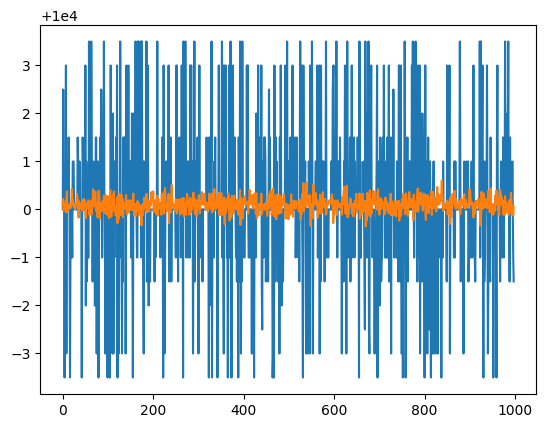

In [227]:
plt.plot(Y[::2])
plt.plot(Y_p[::2])

## Starfruit

In [214]:
X = []
Y = []
trend = np.array(df_star['mid_price'].to_list())
timestep = 4

for i in range(len(trend)-timestep-1):

    X.append(trend[i:i+timestep]) 
    Y.append(trend[i+timestep])

X = np.array(X)
Y = np.array(Y)

In [215]:
import statsmodels.api as sm

X = sm.add_constant(X)

model = sm.OLS(Y[:1000], X[:1000,:])
res = model.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     4283.
Date:                Thu, 04 Apr 2024   Prob (F-statistic):               0.00
Time:                        18:33:35   Log-Likelihood:                -1715.1
No. Observations:                1000   AIC:                             3440.
Df Residuals:                     995   BIC:                             3465.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.6654     37.594      1.906      0.0

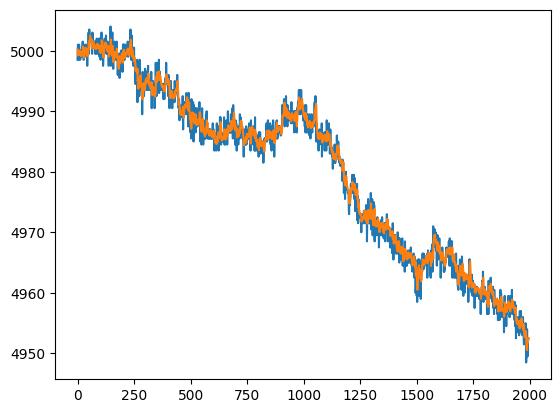

In [216]:
Y_pred = res.predict(X)
plt.plot(Y)
plt.plot(Y_pred)